In [18]:
import pandas as pd
import csv as csv
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import seaborn as sns

In [32]:
path= r"C:\Users\Ruth Kioko\Desktop\DSC_COURSE\PHASE2REPOS\CHECKPOINTS\Group-5-phase-2-project\kc_house_data.csv"
df = pd.read_csv(path, index_col=0)

In [7]:
columns_to_drop = ['date','yr_renovated','view']

# Drop the specified columns
house_df = df.drop(columns=columns_to_drop)

# Display the first few rows to confirm the columns have been dropped
house_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


In [8]:
print(f"NULL VALUES: {house_df.isna().sum()}")

# Display summary statistics
print(f"SUMMARY STATISTICS: {house_df.describe()}")


NULL VALUES: price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64
SUMMARY STATISTICS:               price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   5.402966e+05      3.373200      2.115826   2080.321850  1.509941e+04   
std    3.673681e+05      0.926299      0.768984    918.106125  4.141264e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.220000e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.

In [9]:
print(house_df['waterfront'].dtype)
# Check unique values in the 'waterfront' column
print(house_df['waterfront'].unique())

float64
[nan  0.  1.]


In [10]:
missing_proportion = house_df['waterfront'].isnull().mean()
print(f"Proportion of missing values in 'waterfront': {missing_proportion: .2%}")

Proportion of missing values in 'waterfront':  11.00%


In [12]:
#check mode and select the first mode [0]
waterfront_mode = house_df['waterfront'].mode()[0]  
waterfront_mode

house_df['waterfront'] = house_df['waterfront'].fillna(waterfront_mode)

# Convert to categorical
house_df['waterfront'] = house_df['waterfront'].astype('category')



In [13]:
# Check for duplicate rows
duplicates = house_df.duplicated()

# Count duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

# View duplicate rows
duplicate_rows = house_df[duplicates]
duplicate_rows.head()


Number of duplicate rows: 5


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,
1825069031,550000.0,4,1.75,2410,8447,2.0,0.0,4,8,2060,350.0,1936,98074,47.6499,-122.088,2520,14789
7899800864,259950.0,2,2.00,1070,649,2.0,0.0,3,9,720,350.0,2008,98106,47.5213,-122.357,1070,928
6308000010,585000.0,3,2.50,2290,5089,2.0,0.0,3,9,2290,0.0,2001,98006,47.5443,-122.172,2290,7984
8648900110,555000.0,3,2.50,1940,3211,2.0,0.0,3,8,1940,0.0,2009,98027,47.5644,-122.093,1880,3078
9385200042,529500.0,3,2.25,1410,905,3.0,0.0,3,9,1410,0.0,2014,98116,47.5818,-122.402,1510,1352


In [14]:
house_df_cleaned = house_df.drop_duplicates()

# Verify the changes
print(f"Number of rows before dropping duplicates: {len(house_df)}")
print(f"Number of rows after dropping duplicates: {len(house_df_cleaned)}")

Number of rows before dropping duplicates: 21597
Number of rows after dropping duplicates: 21592


In [15]:
print(f"NULL: {house_df_cleaned.isna().sum()}")
print(f"SHAPE: {house_df_cleaned.shape}")

NULL: price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
SHAPE: (21592, 17)


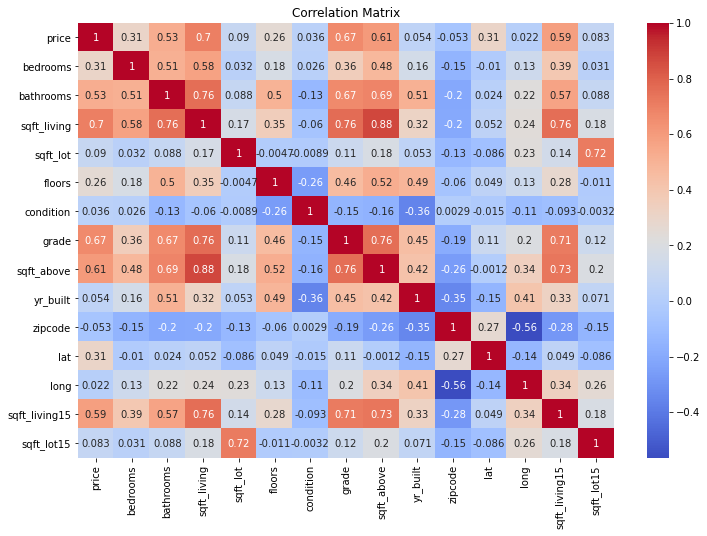

price            1.000000
sqft_living      0.701917
grade            0.668058
sqft_above       0.605359
sqft_living15    0.585240
bathrooms        0.525914
bedrooms         0.308763
lat              0.306691
floors           0.256903
sqft_lot         0.089868
sqft_lot15       0.082833
yr_built         0.054004
condition        0.036039
long             0.021997
zipcode         -0.053379
Name: price, dtype: float64

In [19]:
correlation_matrix = house_df_cleaned.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Display the correlation with the target variable
correlation_with_target = correlation_matrix['price'].sort_values(ascending=False)
correlation_with_target

In [23]:
selected_features = ['price', 'sqft_living', 'grade', 'bathrooms', 'bedrooms', 'floors', 'sqft_living15', 'sqft_above', 'sqft_lot', 'lat', 'sqft_living15', 'sqft_above', 'sqft_living15', 'sqft_living']
# Select only the relevant columns
house_df_relevant = house_df_cleaned[selected_features]
# Display the first few rows to verify
house_df_relevant.head()

,price,sqft_living,grade,bathrooms,bedrooms,floors,sqft_living15,sqft_above,sqft_lot,lat,sqft_living15,sqft_above,sqft_living15,sqft_living
id,,,,,,,,,,,,,,
7129300520,221900.0,1180,7,1.00,3,1.0,1340,1180,5650,47.5112,1340,1180,1340,1180
6414100192,538000.0,2570,7,2.25,3,2.0,1690,2170,7242,47.7210,1690,2170,1690,2570
5631500400,180000.0,770,6,1.00,2,1.0,2720,770,10000,47.7379,2720,770,2720,770
2487200875,604000.0,1960,7,3.00,4,1.0,1360,1050,5000,47.5208,1360,1050,1360,1960
1954400510,510000.0,1680,8,2.00,3,1.0,1800,1680,8080,47.6168,1800,1680,1800,1680


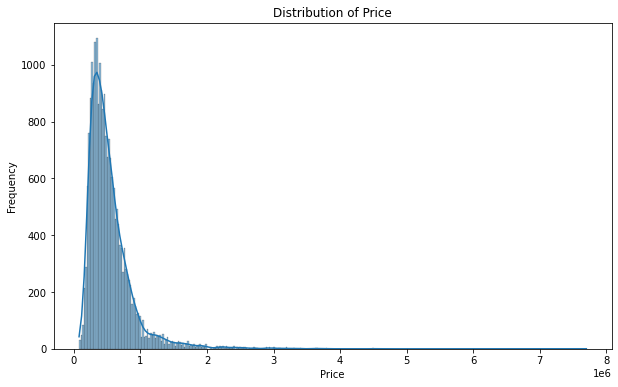

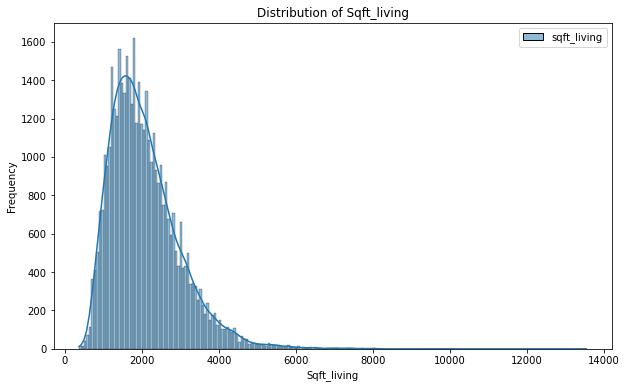

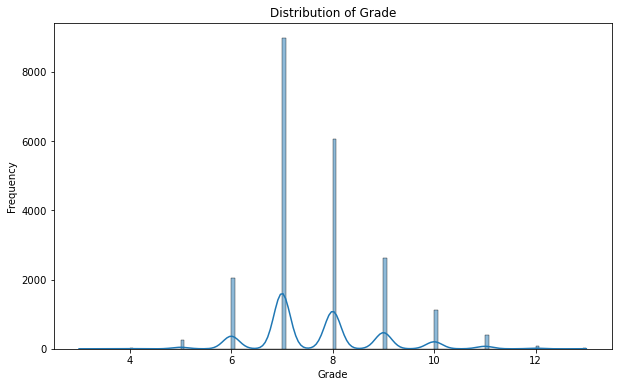

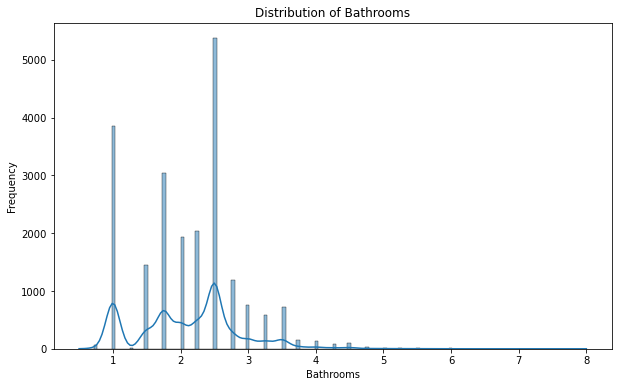

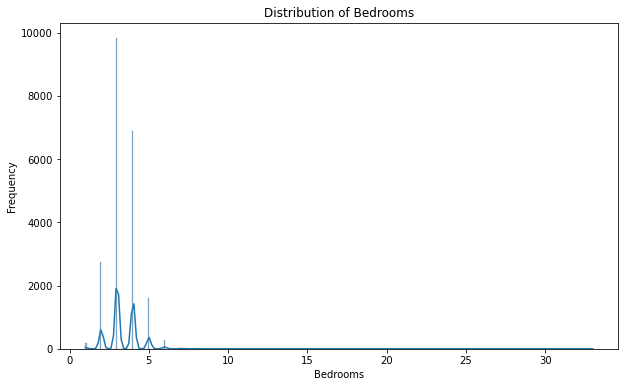

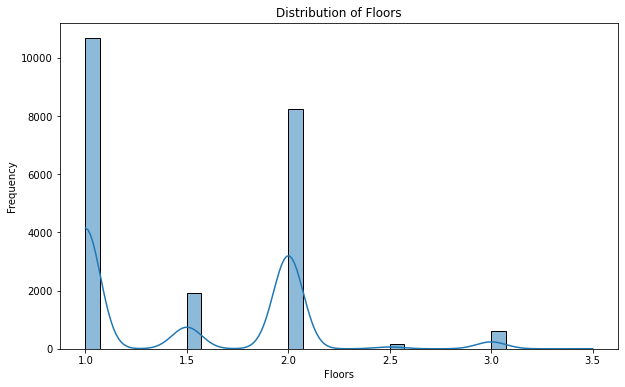

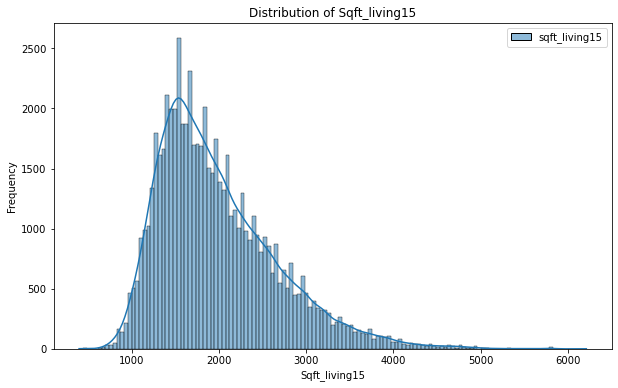

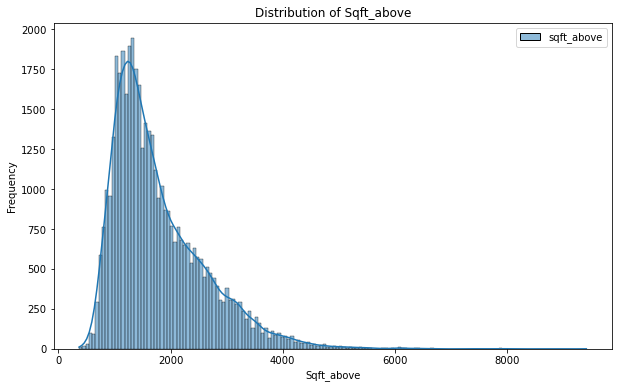

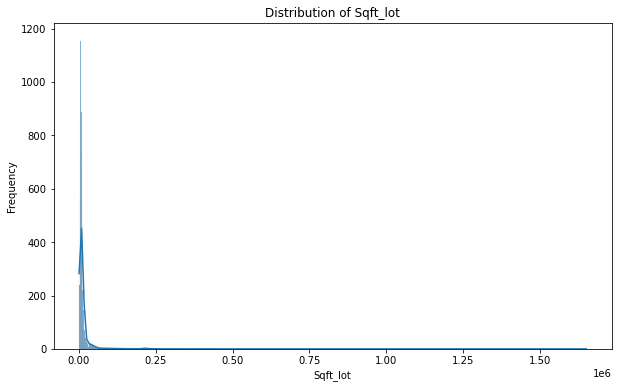

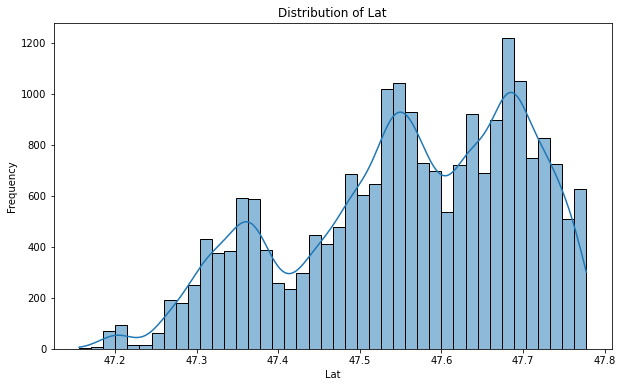

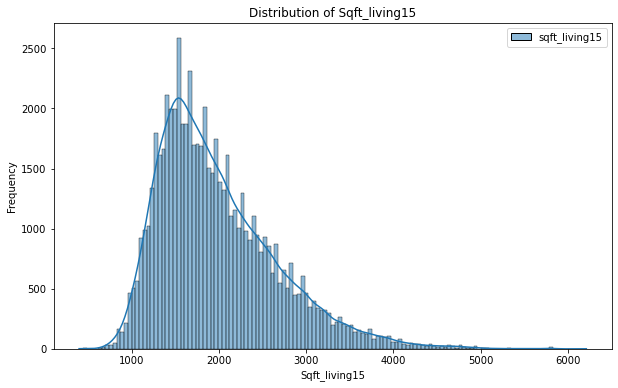

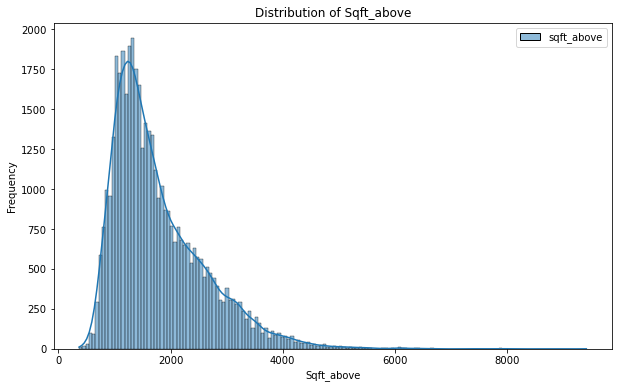

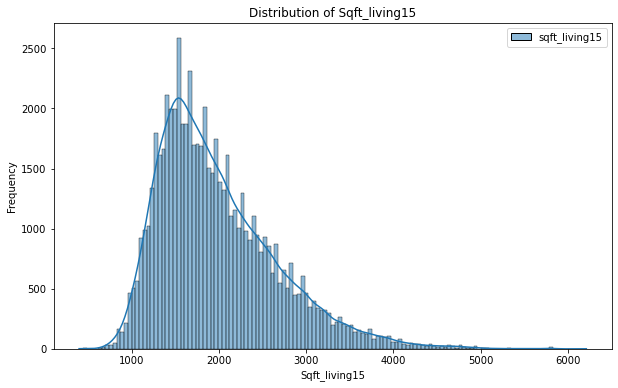

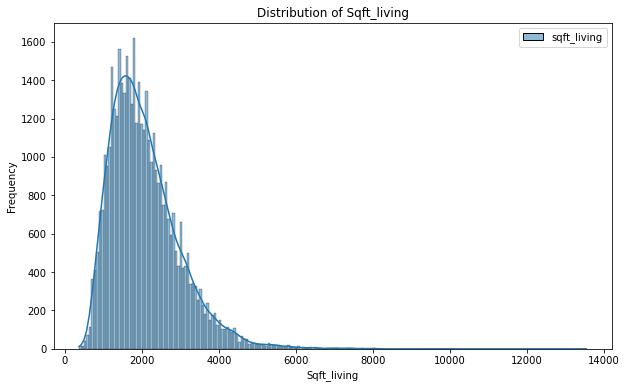

In [21]:
for feature in selected_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(house_df_relevant[feature], kde=True)
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Frequency')
    plt.show()
    

In [25]:
house_df_relevant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21592 entries, 7129300520 to 1523300157
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21592 non-null  float64
 1   sqft_living    21592 non-null  int64  
 2   grade          21592 non-null  int64  
 3   bathrooms      21592 non-null  float64
 4   bedrooms       21592 non-null  int64  
 5   floors         21592 non-null  float64
 6   sqft_living15  21592 non-null  int64  
 7   sqft_above     21592 non-null  int64  
 8   sqft_lot       21592 non-null  int64  
 9   lat            21592 non-null  float64
 10  sqft_living15  21592 non-null  int64  
 11  sqft_above     21592 non-null  int64  
 12  sqft_living15  21592 non-null  int64  
 13  sqft_living    21592 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 2.5 MB


In [27]:
from scipy.stats import skew
price_skewness = skew(house_df_relevant['price'])
print(f'Skewness of price using scipy: {price_skewness}')

Skewness of price using scipy: 4.022723746721583


In [28]:
skewness = house_df_relevant.skew()
skewness

price             4.023003
sqft_living       1.473128
grade             0.788717
bathrooms         0.519747
bedrooms          2.023714
floors            0.614658
sqft_living15     1.106952
sqft_above        1.447510
sqft_lot         13.071273
lat              -0.485434
sqft_living15     1.106952
sqft_above        1.447510
sqft_living15     1.106952
sqft_living       1.473128
dtype: float64

In [42]:
print(house_df_relevant.index.duplicated().any())

True


In [82]:
duplicates = house_df_relevant.duplicated()

# Count duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

# View duplicate rows
duplicate_rows = house_df_relevant[duplicates]
duplicate_rows.head()


Number of duplicate rows: 1


,price,sqft_living,grade,bathrooms,bedrooms,floors,sqft_living15,sqft_above,sqft_lot,lat,sqft_living15,sqft_above,sqft_living15,sqft_living
id,,,,,,,,,,,,,,
3629700080,635000.0,2230,8,3.0,3,2.5,2290,1850,1407,47.5446,2290,1850,2290,2230


In [91]:
house_df_cleaned = house_df_relevant.drop_duplicates()

# Verify the changes
print(f"Number of rows before dropping duplicates: {len(house_df)}")
print(f"Number of rows after dropping duplicates: {len(house_df_cleaned)}")

Number of rows before dropping duplicates: 21597
Number of rows after dropping duplicates: 21591


In [93]:
def remove_outliers(house_df_cleaned, columns):
    for column in columns:
        # Calculate quartiles and IQR for the current column
        Q1 = house_df_cleaned[column].quantile(0.25)
        Q3 = house_df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate lower and upper bounds for outlier detection
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Print debug information for current column and bounds
        print(f"Column: {column}")
        print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
        
        # Filter DataFrame based on outliers for the current column
        house_df_relevant_no_outliers = house_df_cleaned[(house_df_cleaned[column] >= lower_bound) & (house_df_cleaned[column] <= upper_bound)]
        
        # Print intermediate DataFrame shape after filtering
        print(f"Intermediate DataFrame shape: {house_df_relevant_no_outliers.shape}")
    
    # Return the DataFrame after removing outliers for all columns
    return house_df_relevant_no_outliers

Column: price
Lower Bound: -162500.0, Upper Bound: 1129500.0
Intermediate DataFrame shape: (20433, 14)
Column: sqft_living
Lower Bound: sqft_living   -250.0
sqft_living   -250.0
dtype: float64, Upper Bound: sqft_living    4230.0
sqft_living    4230.0
dtype: float64


ValueError: cannot reindex from a duplicate axis

In [85]:
house_df_cleaned_outliers = remove_outliers(house_df_cleaned, selected_features)

Column: price
Lower Bound: -162500.0, Upper Bound: 1129500.0
Intermediate DataFrame shape: (20433, 14)
Column: sqft_living
Lower Bound: sqft_living   -250.0
sqft_living   -250.0
dtype: float64, Upper Bound: sqft_living    4230.0
sqft_living    4230.0
dtype: float64


ValueError: cannot reindex from a duplicate axis